## Objective
Recongize and Crack Captcha using Deep Learning

## 1. Libarary


* captcha
A captcha library that generates audio and image CAPTCHAs.
```
$pip install captcha
```
* pydot
```
pip install pydot-ng
```
* graphviz
```
pip install graphviz
```

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


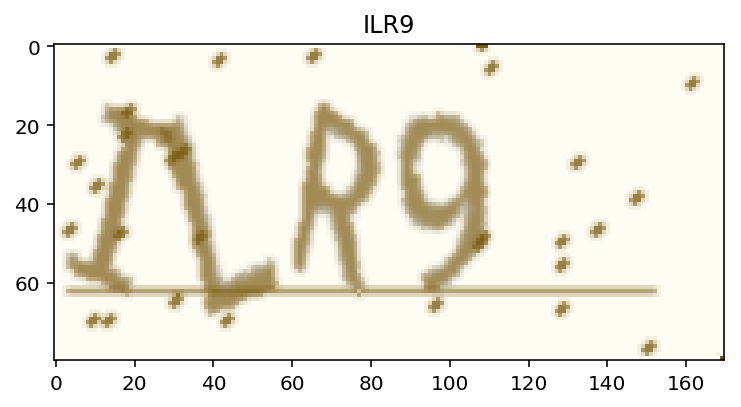

In [17]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

## 2. Data Generation

In [18]:
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

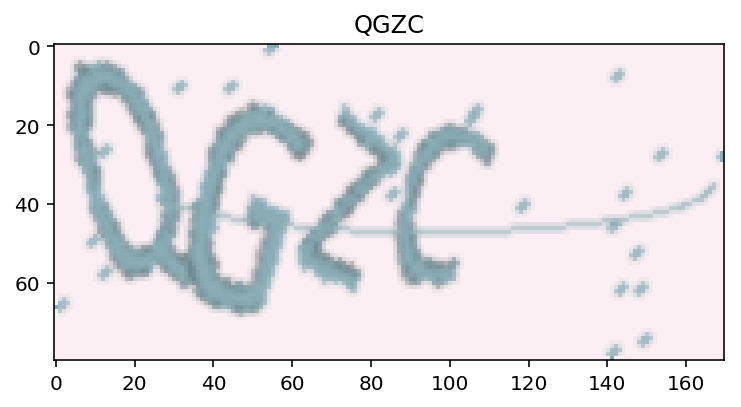

In [19]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))

## 3. Build up Deep Learning via Keras

In [20]:
from keras.models import *
from keras.layers import *

input_tensor = Input((height, width, 3))
x = input_tensor
for i in range(4):
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
model = Model(input=input_tensor, output=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

C:\Users\tw87734w\AppData\Local\Continuum\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\tw87734w\AppData\Local\Continuum\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\tw87734w\AppData\Local\Continuum\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\tw87734w\AppData\Local\Continuum\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\tw87734w\AppData\Local\Continuum\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call 

## 4. Visualizations

In [ ]:
# import pydotplus as pydot

In [ ]:
# from keras.utils import plot_model

# from IPython.display import Image

# plot_model(model, to_file="model.png", show_shapes=True)
# Image('model.png')

## 5. Training

In [ ]:
model.fit_generator(gen(), samples_per_epoch=51200, nb_epoch=5, 
                    nb_worker=2, pickle_safe=True, 
                    validation_data=gen(), nb_val_samples=1280)